In [1]:
import numpy as np
import systemml

In [26]:
import matplotlib.pyplot as plt
from sklearn import datasets
from systemml import MLContext,dml,dmlFromResource
ml = MLContext(sc)

In [3]:
plt.switch_backend('agg')

In [4]:
%matplotlib inline

In [13]:
diab = datasets.load_diabetes()

In [18]:
X = diab.data[:,np.newaxis,2]

In [19]:
x_train = X[:-20]
x_test = X[-20:]
y_train = diab.target[:-20].reshape(-1,1)

In [20]:
y_test = diab.target[-20:].reshape(-1,1)

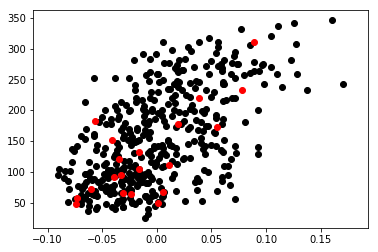

In [21]:
plt.scatter(x_train,y_train,color='black')
plt.scatter(x_test,y_test,color='red')

In [22]:
## train a  linear regresssion model with the dml

In [23]:
## the solve in the dml withh solve  a equation which is  if the a and b given the 
# solve will give you the (ax-b)=0 that means you can find the x with solve
## the relationship between the feature and the target is lineat so we use the normal function y=normal(Xw,a**2)
## we will use the cost function like s always 1/2(Xw-y)**2
## then we differentiate with w to make the equation easier to calculate we fond (X'X)w - (X'y)
## then to find the weight we use the solve funcion 



In [29]:
## we are adding an extra bias with X with cbind function a row of ones
script  = """
ones = matrix(1,rows=nrow(X),cols=1)
X = cbind (X,ones)
A = t(X) %*% X
b = t(X) %*% y
w = solve(A,b)
bias = as.scalar(w[nrow(w),1])
w = w[1:nrow(w)-1,]
"""

In [30]:
prog = dml(script).input(X=x_train,y=y_train).output('w','bias')

In [31]:
w,bias  = ml.execute(prog).get('w','bias')

SystemML Statistics:
Total execution time:		0.347 sec.
Number of executed Spark inst:	2.




In [32]:
w = w.toNumPy()

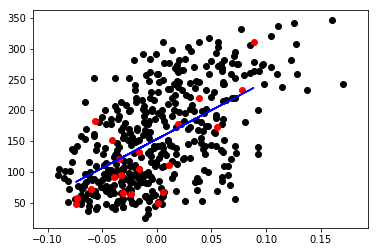

In [36]:
plt.scatter(x_train,y_train,color='black')
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,(w*x_test)+bias,color='blue')